# Лабораторна робота No6
## ФБ-21 Ємець Валерія
### Структури для роботи з великими обсягами даних в Python
### Мета: отримати навички роботи із структурами для зберігання в Python (python, numpy, pandas, numpy array, dataframe, timeit)
---
## Рівень 1
---

Завантаження датасету

In [222]:
import requests
import zipfile
import io
import pandas as pd

# Завантаження даних
url_download = 'https://archive.ics.uci.edu/static/public/235/individual+household+electric+power+consumption.zip'
file_name = 'individual+household+electric+power+consumption.zip'

response = requests.get(url_download)
zip_file = zipfile.ZipFile(io.BytesIO(response.content))
zip_file.extractall()

# Завантаження та підготовка даних
def load_and_prepare_data(filepath):
    # Завантаження CSV файлу в DataFrame
    df = pd.read_csv(filepath, sep=';', parse_dates={'DateTime': ['Date', 'Time']}, na_values='?')
    df.dropna(inplace=True)

    return df





In [223]:
import numpy as np
import pandas as pd
import time
from prettytable import PrettyTable

def load_and_prepare_data(filepath):
    # Завантаження даних з файлу
    df = pd.read_csv(filepath, sep=';', low_memory=False, na_values=['?'])
    df.dropna(inplace=True)

 

    # Перетворення колонок до числового типу
    numeric_columns = ['Global_active_power', 'Global_reactive_power', 'Voltage', 
                       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']
    df[numeric_columns] = df[numeric_columns].astype(float)

    # Перетворення DataFrame на numpy array
    data_numpy = df.values

    return df, data_numpy

def create_pretty_table(data, columns, num_rows=7):
    table = PrettyTable()
    table.field_names = columns
    for row in data[:num_rows]:
        table.add_row(row)
    return table

# Завантаження та підготовка даних
df, data_numpy = load_and_prepare_data('household_power_consumption.txt')



1. Обрати всі домогосподарства, у яких загальна активна споживана потужність перевищує 5 кВт.

Зробимо з використанням numpy array:

In [224]:
def task1_numpy(data_numpy, df):
    power_index = df.columns.get_loc('Global_active_power')
    start_time = time.time()
    selected_households_numpy = data_numpy[data_numpy[:, power_index] > 5]
    end_time = time.time()

    table = create_pretty_table(selected_households_numpy, df.columns.tolist())
    print(f"Time taken using numpy: {end_time - start_time:.6f} seconds")
    print(f"Number of households selected: {selected_households_numpy.shape[0]}")
    print(table)

task1_numpy(data_numpy, df)



Time taken using numpy: 0.069868 seconds
Number of households selected: 17547
+------------+----------+---------------------+-----------------------+---------+------------------+----------------+----------------+----------------+
|    Date    |   Time   | Global_active_power | Global_reactive_power | Voltage | Global_intensity | Sub_metering_1 | Sub_metering_2 | Sub_metering_3 |
+------------+----------+---------------------+-----------------------+---------+------------------+----------------+----------------+----------------+
| 16/12/2006 | 17:25:00 |         5.36        |         0.436         |  233.63 |       23.0       |      0.0       |      1.0       |      16.0      |
| 16/12/2006 | 17:26:00 |        5.374        |         0.498         |  233.29 |       23.0       |      0.0       |      2.0       |      17.0      |
| 16/12/2006 | 17:27:00 |        5.388        |         0.502         |  233.74 |       23.0       |      0.0       |      1.0       |      17.0      |
| 16/12/20

Тепер використовуючи pandas dataframe:

In [225]:
def task1_pandas(df):
    start_time = time.time()
    selected_households_df = df[df['Global_active_power'] > 5]
    end_time = time.time()

    table = create_pretty_table(selected_households_df.values, selected_households_df.columns.tolist())
    print(f"Time taken using pandas: {end_time - start_time:.6f} seconds")
    print(f"Number of households selected: {selected_households_df.shape[0]}")
    print(table)

task1_pandas(df)


Time taken using pandas: 0.012493 seconds
Number of households selected: 17547
+------------+----------+---------------------+-----------------------+---------+------------------+----------------+----------------+----------------+
|    Date    |   Time   | Global_active_power | Global_reactive_power | Voltage | Global_intensity | Sub_metering_1 | Sub_metering_2 | Sub_metering_3 |
+------------+----------+---------------------+-----------------------+---------+------------------+----------------+----------------+----------------+
| 16/12/2006 | 17:25:00 |         5.36        |         0.436         |  233.63 |       23.0       |      0.0       |      1.0       |      16.0      |
| 16/12/2006 | 17:26:00 |        5.374        |         0.498         |  233.29 |       23.0       |      0.0       |      2.0       |      17.0      |
| 16/12/2006 | 17:27:00 |        5.388        |         0.502         |  233.74 |       23.0       |      0.0       |      1.0       |      17.0      |
| 16/12/2

2. Обрати всі домогосподарства, у яких вольтаж перевищую 235 В.

Використовуючи numpy array:

In [226]:
def task2_numpy(data_numpy, df):
    voltage_index = df.columns.get_loc('Voltage')
    start_time = time.time()
    selected_voltage_numpy = data_numpy[data_numpy[:, voltage_index] > 235]
    end_time = time.time()

    table = create_pretty_table(selected_voltage_numpy, df.columns.tolist())
    print(f"Time taken using numpy for Voltage: {end_time - start_time:.6f} seconds")
    print(f"Number of households selected for Voltage: {selected_voltage_numpy.shape[0]}")
    print(table)

task2_numpy(data_numpy, df)


Time taken using numpy for Voltage: 0.252784 seconds
Number of households selected for Voltage: 1952491
+------------+----------+---------------------+-----------------------+---------+------------------+----------------+----------------+----------------+
|    Date    |   Time   | Global_active_power | Global_reactive_power | Voltage | Global_intensity | Sub_metering_1 | Sub_metering_2 | Sub_metering_3 |
+------------+----------+---------------------+-----------------------+---------+------------------+----------------+----------------+----------------+
| 16/12/2006 | 17:28:00 |        3.666        |         0.528         |  235.68 |       15.8       |      0.0       |      1.0       |      17.0      |
| 16/12/2006 | 17:29:00 |         3.52        |         0.522         |  235.02 |       15.0       |      0.0       |      2.0       |      17.0      |
| 16/12/2006 | 17:30:00 |        3.702        |          0.52         |  235.09 |       15.8       |      0.0       |      1.0       |  

Використовуючи pandas dataframe:

In [227]:
def task2_pandas(df):
    start_time = time.time()
    selected_voltage_df = df[df['Voltage'] > 235]
    end_time = time.time()

    table = create_pretty_table(selected_voltage_df.values, selected_voltage_df.columns.tolist())
    print(f"Time taken using pandas for Voltage: {end_time - start_time:.6f} seconds")
    print(f"Number of households selected for Voltage: {selected_voltage_df.shape[0]}")
    print(table)

task2_pandas(df)


Time taken using pandas for Voltage: 0.142493 seconds
Number of households selected for Voltage: 1952491
+------------+----------+---------------------+-----------------------+---------+------------------+----------------+----------------+----------------+
|    Date    |   Time   | Global_active_power | Global_reactive_power | Voltage | Global_intensity | Sub_metering_1 | Sub_metering_2 | Sub_metering_3 |
+------------+----------+---------------------+-----------------------+---------+------------------+----------------+----------------+----------------+
| 16/12/2006 | 17:28:00 |        3.666        |         0.528         |  235.68 |       15.8       |      0.0       |      1.0       |      17.0      |
| 16/12/2006 | 17:29:00 |         3.52        |         0.522         |  235.02 |       15.0       |      0.0       |      2.0       |      17.0      |
| 16/12/2006 | 17:30:00 |        3.702        |          0.52         |  235.09 |       15.8       |      0.0       |      1.0       | 

3. Обрати всі домогосподарства, у яких сила струму лежить в межах
19-20 А, для них виявити ті, у яких пральна машина та холодильних
споживають більше, ніж бойлер та кондиціонер.

Використовуючи numpy array:

In [228]:
def task3_numpy(data_numpy, df):
    current_index = df.columns.get_loc('Global_intensity')
    sub_metering_1_index = df.columns.get_loc('Sub_metering_1')
    sub_metering_2_index = df.columns.get_loc('Sub_metering_2')
    sub_metering_3_index = df.columns.get_loc('Sub_metering_3')

    start_time = time.time()
    current_range_numpy = data_numpy[(data_numpy[:, current_index] >= 19) & (data_numpy[:, current_index] <= 20)]
    selected_appliances_numpy = current_range_numpy[
        (current_range_numpy[:, sub_metering_1_index] + current_range_numpy[:, sub_metering_2_index]) >
        (current_range_numpy[:, sub_metering_3_index])
    ]
    end_time = time.time()

    table = create_pretty_table(selected_appliances_numpy, df.columns.tolist())
    print(f"Time taken using numpy for appliances: {end_time - start_time:.6f} seconds")
    print(f"Number of households selected for appliances: {selected_appliances_numpy.shape[0]}")
    print(table)

task3_numpy(data_numpy, df)




Time taken using numpy for appliances: 0.152921 seconds
Number of households selected for appliances: 5579
+------------+----------+---------------------+-----------------------+---------+------------------+----------------+----------------+----------------+
|    Date    |   Time   | Global_active_power | Global_reactive_power | Voltage | Global_intensity | Sub_metering_1 | Sub_metering_2 | Sub_metering_3 |
+------------+----------+---------------------+-----------------------+---------+------------------+----------------+----------------+----------------+
| 16/12/2006 | 18:09:00 |        4.464        |         0.136         |  234.66 |       19.0       |      0.0       |      37.0      |      16.0      |
| 17/12/2006 | 01:04:00 |        4.582        |         0.258         |  238.08 |       19.6       |      0.0       |      13.0      |      0.0       |
| 17/12/2006 | 01:08:00 |        4.618        |         0.104         |  239.61 |       19.6       |      0.0       |      27.0      

Використовуючи pandas dataframe:

In [229]:
def task3_pandas(df):
    start_time = time.time()
    current_range_df = df[(df['Global_intensity'] >= 19) & (df['Global_intensity'] <= 20)]
    selected_appliances_df = current_range_df[
        (current_range_df['Sub_metering_1'] + current_range_df['Sub_metering_2']) >
        (current_range_df['Sub_metering_3'])
    ]
    end_time = time.time()

    table = create_pretty_table(selected_appliances_df.values, selected_appliances_df.columns.tolist())
    print(f"Time taken using pandas for appliances: {end_time - start_time:.6f} seconds")
    print(f"Number of households selected for appliances: {selected_appliances_df.shape[0]}")
    print(table)

task3_pandas(df)


Time taken using pandas for appliances: 0.018086 seconds
Number of households selected for appliances: 5579
+------------+----------+---------------------+-----------------------+---------+------------------+----------------+----------------+----------------+
|    Date    |   Time   | Global_active_power | Global_reactive_power | Voltage | Global_intensity | Sub_metering_1 | Sub_metering_2 | Sub_metering_3 |
+------------+----------+---------------------+-----------------------+---------+------------------+----------------+----------------+----------------+
| 16/12/2006 | 18:09:00 |        4.464        |         0.136         |  234.66 |       19.0       |      0.0       |      37.0      |      16.0      |
| 17/12/2006 | 01:04:00 |        4.582        |         0.258         |  238.08 |       19.6       |      0.0       |      13.0      |      0.0       |
| 17/12/2006 | 01:08:00 |        4.618        |         0.104         |  239.61 |       19.6       |      0.0       |      27.0     

4. Обрати випадковим чином 500000 домогосподарств (без повторів
елементів вибірки), для них обчислити середні величини усіх 3-х
груп споживання електричної енергії, а також

Використовуючи numpy array:

In [246]:
import numpy as np
import pandas as pd
import timeit

# Завантаження та підготовка даних
def load_and_prepare_data(filepath):
    df = pd.read_csv(filepath, sep=';', low_memory=False, na_values=['?'], parse_dates={'DateTime': ['Date', 'Time']})
    df.dropna(inplace=True)

    # Перетворення колонок до числового типу
    numeric_columns = ['Global_active_power', 'Global_reactive_power', 'Voltage', 
                       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']
    df[numeric_columns] = df[numeric_columns].astype(float)

    data_numpy = df.to_numpy()

    return df, data_numpy

df, data_numpy = load_and_prepare_data('household_power_consumption.txt')

# Вибір випадкових 500000 рядків без повторів
start_time = timeit.default_timer()
random_households_numpy = data_numpy[np.random.choice(data_numpy.shape[0], 500000, replace=False)]

# Індекси колонок
datetime_index = df.columns.get_loc('DateTime')

# Видалення колонки DateTime перед обчисленням середнього
random_households_numpy = np.delete(random_households_numpy, datetime_index, axis=1)

# Оновлення індексів колонок після видалення 'DateTime'
sub_metering_indices = [df.columns.get_loc(col) - 1 for col in ['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']]

# Обчислення середнього споживання
average_consumption_numpy = np.mean(random_households_numpy[:, sub_metering_indices], axis=0)
end_time = timeit.default_timer()

# Виведення результатів
print("Середнє споживання електричної енергії за підметрами (NumPy):")
print(average_consumption_numpy)
print(f"Час виконання за допомогою NumPy: {end_time - start_time:.6f} секунд")


Середнє споживання електричної енергії за підметрами (NumPy):
[1.102576 1.292076 6.456662]
Час виконання за допомогою NumPy: 0.714886 секунд


Використовуючи pandas dataframe:

In [247]:
start_time = timeit.default_timer()
random_df = df.sample(n=500000, replace=False)
average_consumption_pandas = random_df[['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']].mean()
end_time = timeit.default_timer()

# Виведення результатів
print("Середнє споживання електричної енергії за підметрами:")
print(average_consumption_pandas)
print(f"Час виконання за допомогою Pandas: {end_time - start_time:.6f} секунд")

Середнє споживання електричної енергії за підметрами:
Sub_metering_1    1.121730
Sub_metering_2    1.306114
Sub_metering_3    6.472216
dtype: float64
Час виконання за допомогою Pandas: 0.325915 секунд


5. Обрати ті домогосподарства, які після 18-00 споживають понад 6
кВт за хвилину в середньому, серед відібраних визначити ті, у яких
основне споживання електроенергії у вказаний проміжок часу
припадає на пральну машину, сушарку, холодильник та освітлення
(група 2 є найбільшою), а потім обрати кожен третій результат із
першої половини та кожен четвертий результат із другої половини.

Використовуючи pandas dataframe:

In [248]:
import pandas as pd
import timeit

def fp_fifth_task_pandas(df):
    start = timeit.default_timer()
    lvl1_t5_pandas = df[(df['DateTime'].dt.time > pd.Timestamp('18:00:00').time()) &
                        (df['Global_active_power'] > 6) &
                        (df['Sub_metering_2'] > df['Sub_metering_1']) &
                        (df['Sub_metering_2'] > df['Sub_metering_3'])]

    first = lvl1_t5_pandas.iloc[0:len(lvl1_t5_pandas)//2:3]
    second = lvl1_t5_pandas.iloc[len(lvl1_t5_pandas)//2:len(lvl1_t5_pandas):4]
    result = pd.concat([first, second])
    stop = timeit.default_timer()

    print("\nЧас виконання: ", stop - start)
    print(result.head())

    return result


# Виклик функції та виведення результату
selected_households = fp_fifth_task_pandas(df)




Час виконання:  0.8819088999880478
                 DateTime  Global_active_power  Global_reactive_power  \
41    2006-12-16 18:05:00                6.052                  0.192   
44    2006-12-16 18:08:00                6.308                  0.116   
17494 2006-12-28 20:58:00                6.386                  0.374   
17498 2006-12-28 21:02:00                8.088                  0.262   
17501 2006-12-28 21:05:00                7.230                  0.152   

       Voltage  Global_intensity  Sub_metering_1  Sub_metering_2  \
41      232.93              26.2             0.0            37.0   
44      232.25              27.0             0.0            36.0   
17494   236.63              27.0             1.0            36.0   
17498   235.50              34.4             1.0            72.0   
17501   235.22              30.6             1.0            73.0   

       Sub_metering_3  
41               17.0  
44               17.0  
17494            17.0  
17498            17.

Використовуючи numpy array:

In [250]:
import numpy as np
import pandas as pd
import timeit

# Завантаження та підготовка даних
def load_and_prepare_data(filepath):
    df = pd.read_csv(filepath, sep=';', low_memory=False, na_values=['?'], parse_dates={'DateTime': ['Date', 'Time']})
    df.dropna(inplace=True)
    return df

def fp_fifth_task_np(df):
    start = timeit.default_timer()
    
    # Перетворення DataFrame на numpy array
    data_np = df.to_numpy()
    
    # Фільтрація за умовами
    times = df['DateTime'].dt.time
    mask1 = (times >= pd.Timestamp('18:00:00').time())
    mask2 = (data_np[:, 1] > 6)  # Global_active_power колонка (index 1)
    mask3 = (data_np[:, 6] > data_np[:, 5])  # Sub_metering_2 колонка (index 6) > Sub_metering_1 колонка (index 5)
    mask4 = (data_np[:, 6] > data_np[:, 7])  # Sub_metering_2 колонка (index 6) > Sub_metering_3 колонка (index 7)
    
    filtered_data = data_np[mask1 & mask2 & mask3 & mask4]
    
    # Розділення на першу та другу половину
    first_half = filtered_data[:len(filtered_data)//2]
    second_half = filtered_data[len(filtered_data)//2:]
    
    # Вибір кожного третього з першої половини та кожного четвертого з другої половини
    result_first_half = first_half[::3]
    result_second_half = second_half[::4]
    
    result = np.vstack((result_first_half, result_second_half))
    
    stop = timeit.default_timer()
    
    print("\nЧас виконання: ", stop - start)
    print(result[:5])  # Вивід перших 5 рядків результату

    return result

# Виклик функції та виведення результату
df = load_and_prepare_data('household_power_consumption.txt')
selected_households = fp_fifth_task_np(df)




Час виконання:  2.1642602999927476
[[Timestamp('2006-12-16 18:05:00') 6.052 0.192 232.93 26.2 0.0 37.0 17.0]
 [Timestamp('2006-12-16 18:08:00') 6.308 0.116 232.25 27.0 0.0 36.0 17.0]
 [Timestamp('2006-12-28 20:58:00') 6.386 0.374 236.63 27.0 1.0 36.0 17.0]
 [Timestamp('2006-12-28 21:02:00') 8.088 0.262 235.5 34.4 1.0 72.0 17.0]
 [Timestamp('2006-12-28 21:05:00') 7.23 0.152 235.22 30.6 1.0 73.0 17.0]]


---
## Рівень 2
---

Першим кроком є вибір датасету. 

In [241]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error
import random

# Завантаження датасету Adult
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
headers = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 
           'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 
           'hours_per_week', 'native_country', 'income']

df = pd.read_csv(url, header=None, names=headers, na_values=' ?')

# Перегляд перших рядків датасету
print("Перші 5 рядків датасету Adult:")
print(df.head())

# Інформація про датасет
print("\nІнформація про датасет Adult:")
print(df.info())


Перші 5 рядків датасету Adult:
   age          workclass  fnlwgt   education  education_num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital_status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital_gain  capital_loss  hours_per_week  native_country  income  
0          2174             0        


1. Поборотися із зниклими даними.

In [242]:
# Перевірка наявності пропущених значень
print("Кількість пропущених значень в кожному стовпці:")
print(df.isnull().sum())

# Заміна пропущених значень
df = df.dropna()
print("\nРозмір датасету після видалення рядків з пропущеними значеннями:", df.shape)



Кількість пропущених значень в кожному стовпці:
age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
dtype: int64

Розмір датасету після видалення рядків з пропущеними значеннями: (30162, 15)


In [99]:
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


Пронормувати вибраний датасет або стандартизувати його
(нормалізація і стандартизація мають бути реалізовані як окремі
функції без застосування додаткових бібліотек, як наприклад
sklearn.preprocessing).

In [243]:
# Функція для нормалізації даних
def normalize_data(df, columns):
    for col in columns:
        df[col] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())
    return df

# Функція для стандартизації даних
def standardize_data(df, columns):
    for col in columns:
        df[col] = (df[col] - df[col].mean()) / df[col].std()
    return df

# Вибір числових стовпців для нормалізації або стандартизації
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Нормалізація числових даних
df_normalized = normalize_data(df.copy(), numeric_columns)
print("\nНормалізований датасет:")
print(df_normalized.head())

# Стандартизація числових даних
df_standardized = standardize_data(df.copy(), numeric_columns)
print("\nСтандартизований датасет:")
print(df_standardized.head())



Нормалізований датасет:
        age          workclass    fnlwgt   education  education_num  \
0  0.301370          State-gov  0.043338   Bachelors       0.800000   
1  0.452055   Self-emp-not-inc  0.047277   Bachelors       0.800000   
2  0.287671            Private  0.137244     HS-grad       0.533333   
3  0.493151            Private  0.150212        11th       0.400000   
4  0.150685            Private  0.220703   Bachelors       0.800000   

        marital_status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital_gain  capital_loss  hours_per_week  native_country  income  
0

3. Збудувати гістограму по одному із атрибутів, що буде показувати на
кількість елементів, що знаходяться у 10 діапазонах, які ви задасте.

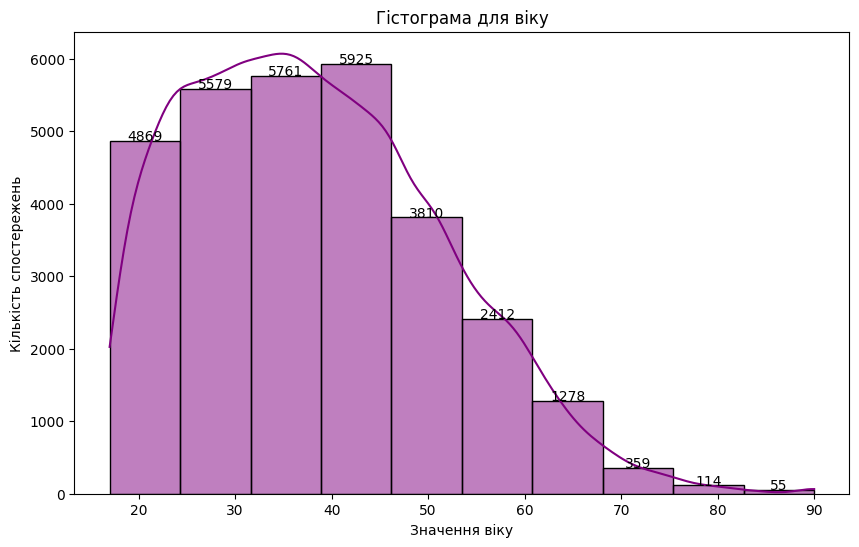


Час виконання:  1.6106708999723196
Кількість елементів в кожному діапазоні:
(16.999, 24.3]    4869
(24.3, 31.6]      5579
(31.6, 38.9]      5761
(38.9, 46.2]      5925
(46.2, 53.5]      3810
(53.5, 60.8]      2412
(60.8, 68.1]      1278
(68.1, 75.4]       359
(75.4, 82.7]       114
(82.7, 90.0]        55
Name: count, dtype: int64
Максимальна кількість елементів в одному діапазоні: 5925
Загальна кількість елементів: 30162


In [244]:
import seaborn as sns
import matplotlib.pyplot as plt



# Перетворення атрибуту 'age' в числовий тип
df['age'] = pd.to_numeric(df['age'], errors='coerce')

# Встановлення діапазонів для гістограми
age_ranges = np.linspace(df['age'].min(), df['age'].max(), 11)

# Побудова гістограми для віку
start = timeit.default_timer()

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', bins=age_ranges, kde=True, color='purple')
plt.title('Гістограма для віку')
plt.xlabel('Значення віку')
plt.ylabel('Кількість спостережень')

# Кількість елементів в кожному діапазоні
value_counts = df['age'].value_counts(bins=age_ranges, sort=False)

# Текст над кожним стовпцем
for idx, count in enumerate(value_counts):
    plt.text(value_counts.index[idx].mid, count + 5, str(count), ha='center')

plt.show()
stop = timeit.default_timer()
print("\nЧас виконання: ", stop - start)

print(f"Кількість елементів в кожному діапазоні:\n{value_counts}")
print(f"Максимальна кількість елементів в одному діапазоні: {value_counts.max()}")
total_count = df['age'].count()
print(f"Загальна кількість елементів: {total_count}")




4. Збудувати графік залежності одного integer/real атрибута від іншого.

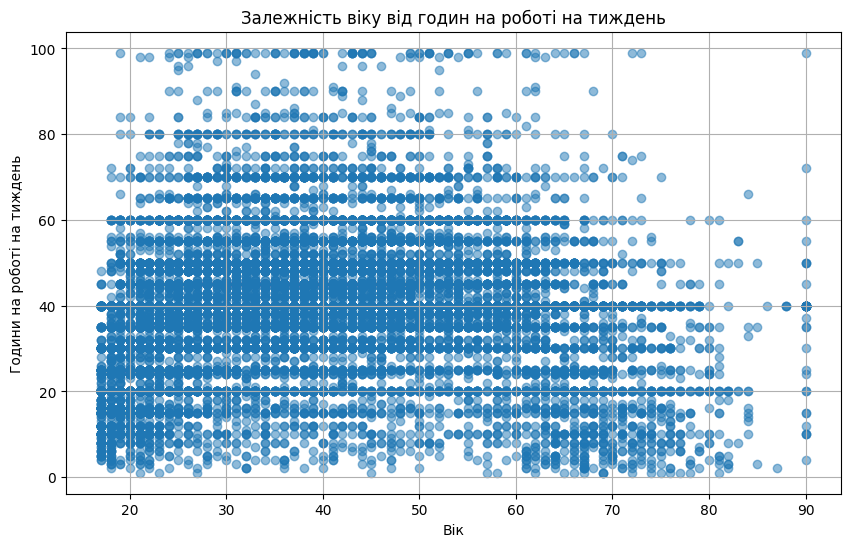

In [87]:
# Побудова scatter plot для віку та годин на роботі на тиждень
plt.figure(figsize=(10, 6))
plt.scatter(df['age'], df['hours_per_week'], alpha=0.5)
plt.title('Залежність віку від годин на роботі на тиждень')
plt.xlabel('Вік')
plt.ylabel('Години на роботі на тиждень')
plt.grid(True)
plt.show()


5. Підрахувати коефіцієнт Пірсона та Спірмена для двох integer/real
атрибутів.

In [93]:
from scipy.stats import pearsonr, spearmanr

# Вибір двох числових стовпців
col1 = 'age'
col2 = 'hours_per_week'

# Обчислення коефіцієнта Пірсона
corr_pearson, _ = pearsonr(df[col1], df[col2])
print(f"\nКоефіцієнт Пірсона між '{col1}' та '{col2}': {corr_pearson:.15f}")

# Обчислення коефіцієнта Спірмена
corr_spearman, _ = spearmanr(df[col1], df[col2])
print(f"Коефіцієнт Спірмена між '{col1}' та '{col2}': {corr_spearman:.15f}")



Коефіцієнт Пірсона між 'age' та 'hours_per_week': 0.068755707509556
Коефіцієнт Спірмена між 'age' та 'hours_per_week': 0.142906810319583


6. Провести One Hot Encoding категоріального string атрибуту.

In [107]:
from sklearn.preprocessing import OneHotEncoder

# Вибір категоріальної ознаки для кодування
categorical_column = 'education'

# Копіюємо датасет
df_copy = df.copy()

# Створюємо екземпляр OneHotEncoder
ohe = OneHotEncoder(drop='first')

# Використовуємо OneHotEncoder для обраної категоріальної ознаки
encoded_features = ohe.fit_transform(df_copy[[categorical_column]])

# Отримуємо імена нових стовпців
encoded_columns = ohe.get_feature_names_out([categorical_column])

# Побудова нового DataFrame з закодованими ознаками
df_encoded = pd.DataFrame(encoded_features.toarray(), columns=encoded_columns)

# Додамо закодовані стовпці до початкового датасету
df_copy = pd.concat([df_copy, df_encoded], axis=1)

# Виведемо перші 5 рядків для перевірки результату
print(df_copy.head())



   age          workclass  fnlwgt   education  education_num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital_status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   ...  education_ 9th  education_ Assoc-acdm  education_ Assoc-voc  \
0  ...             0.0                    0.0                   0.0  

7. Провести візуалізацію багатовимірних даних.

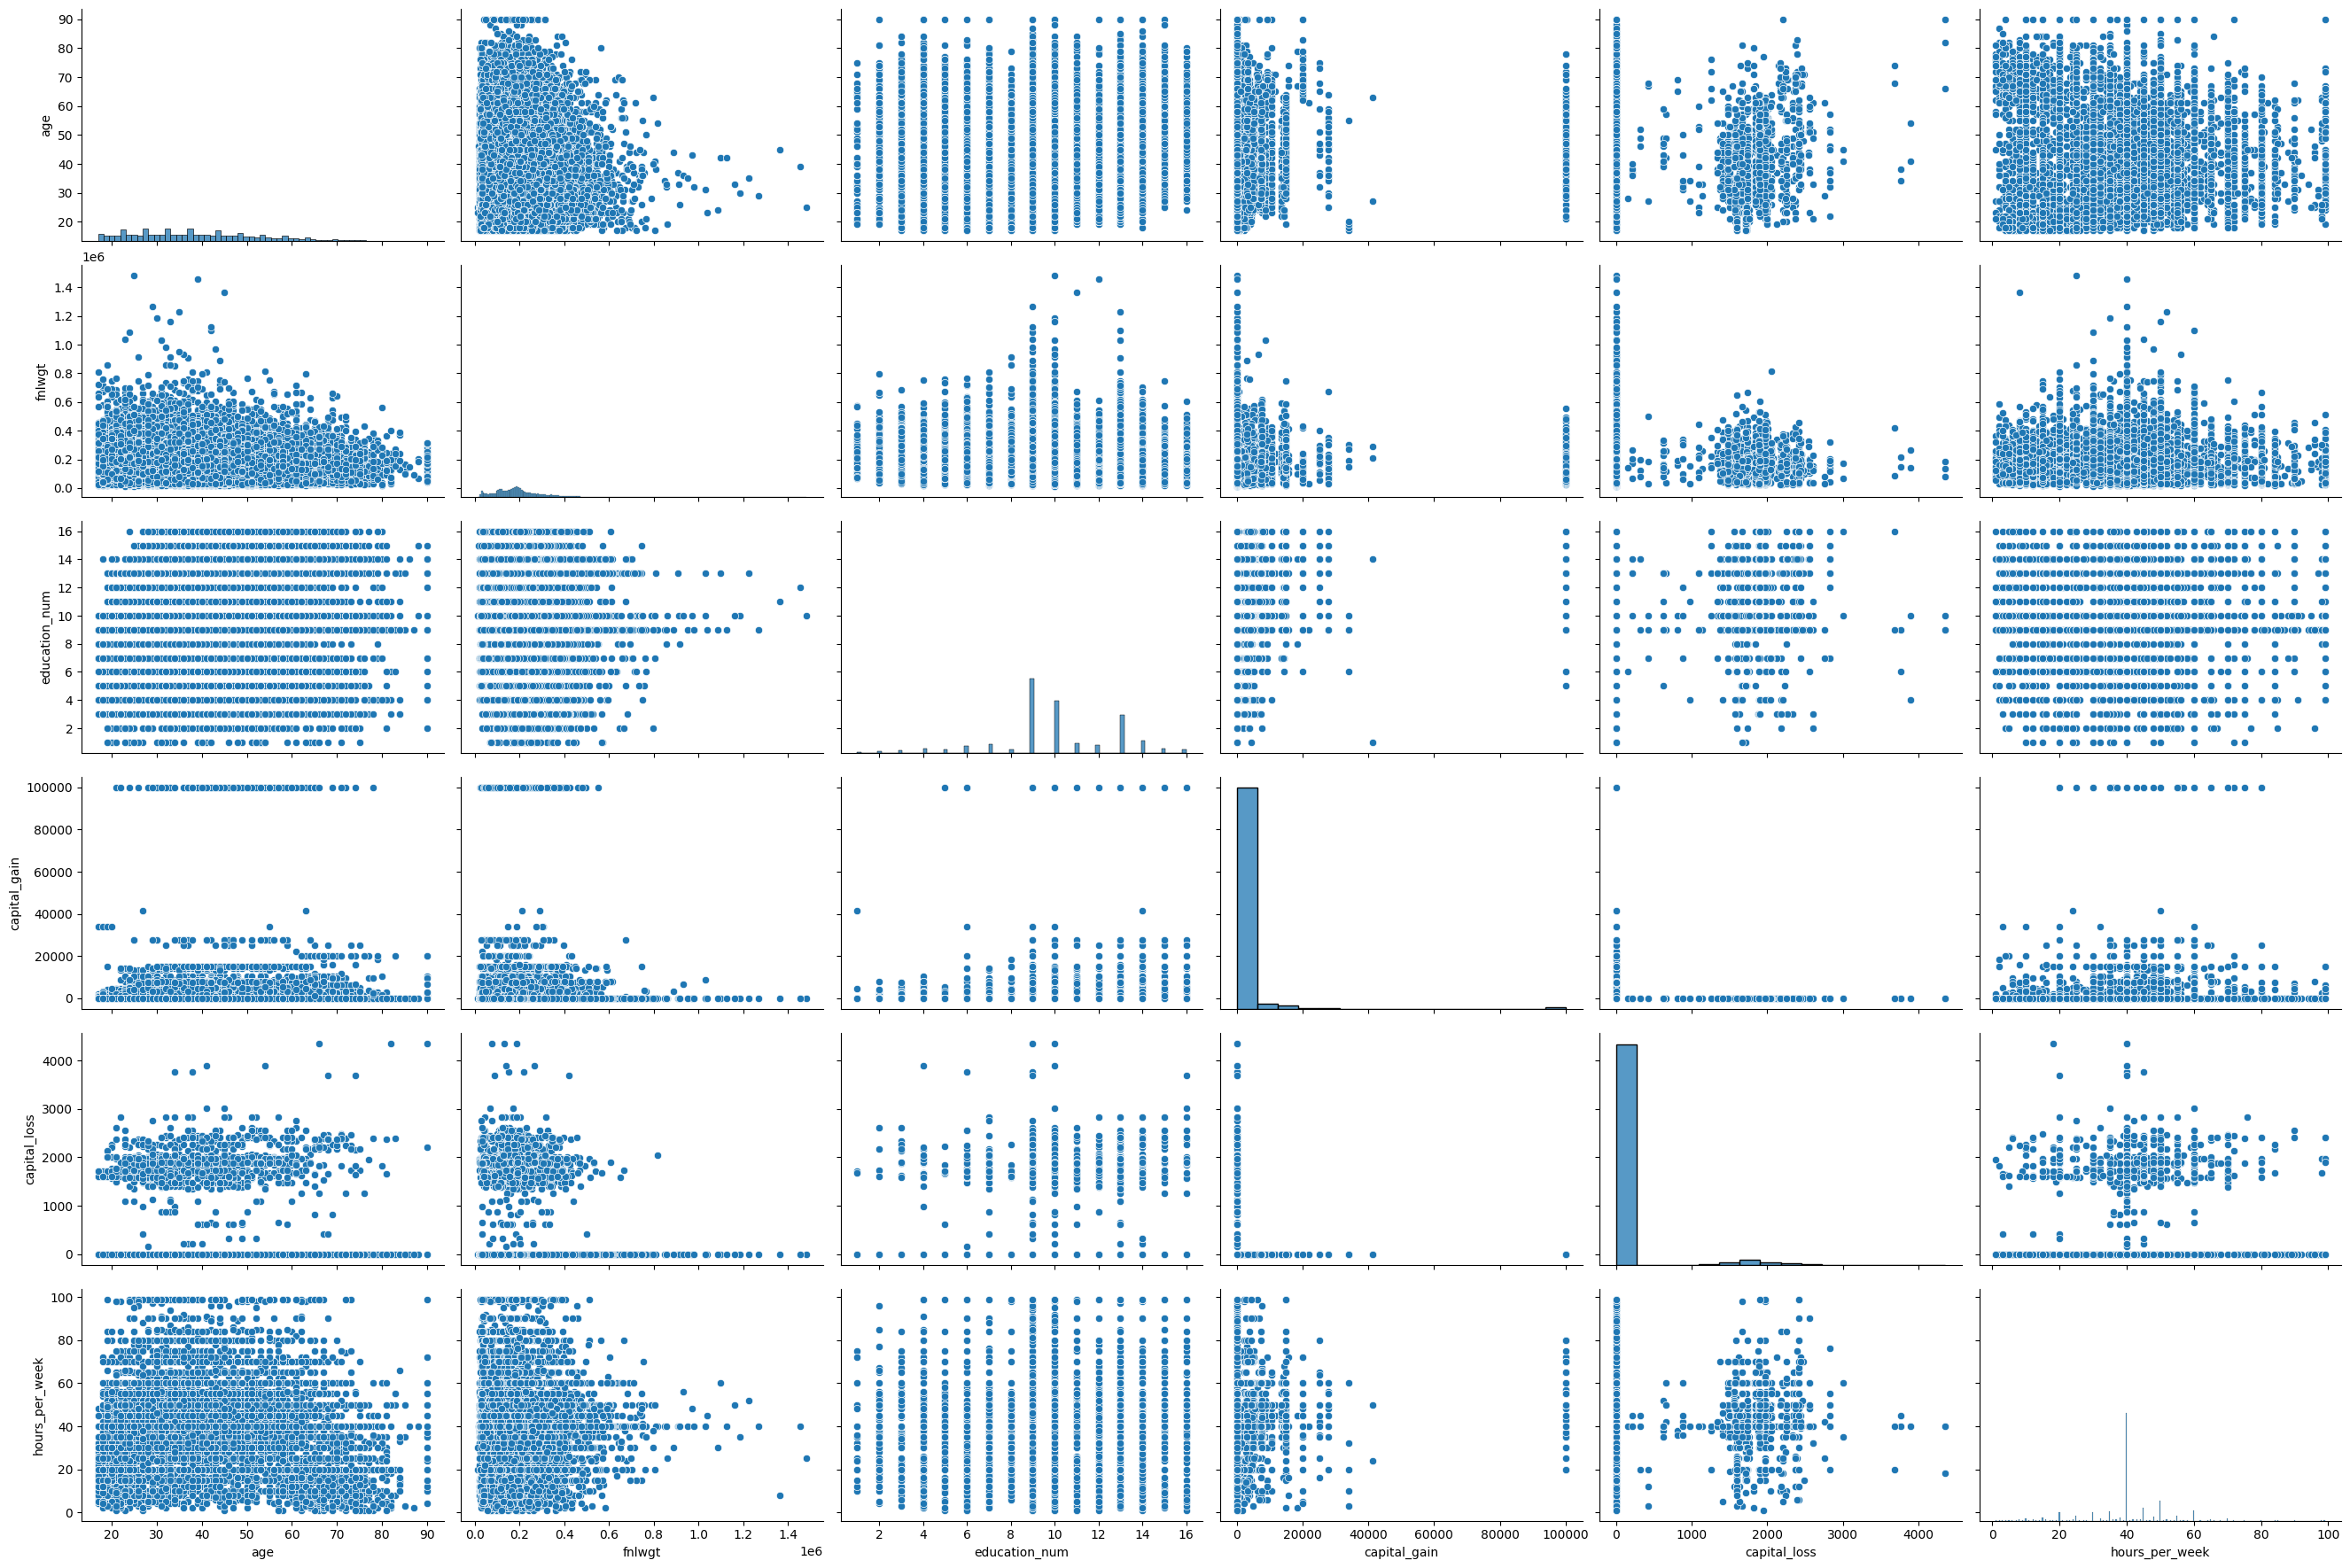

In [116]:
selected_attrs = df.columns[:20]
sns.pairplot(df[selected_attrs], height=3, aspect=1.5)
plt.show()
